# Setup

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# TF Models Pretrained Models from Tensorflow Model Zoo and Install Tensor flow object detection

In [6]:
# https://www.tensorflow.org/install/source_windows

In [6]:
if os.name=='nt':
    !pip install wget
    import wget

In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [9]:
!tf_upgrade_v2 -h

2022-12-15 09:50:16.169655: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
usage: tf_upgrade_v2 [-h] [--infile INPUT_FILE] [--outfile OUTPUT_FILE]
                     [--intree INPUT_TREE] [--outtree OUTPUT_TREE]
                     [--copyotherfiles COPY_OTHER_FILES] [--inplace]
                     [--no_import_rename] [--no_upgrade_compat_v1_import]
                     [--reportfile REPORT_FILENAME] [--mode {DEFAULT,SAFETY}]
                     [--print_all]

Convert a TensorFlow Python file from 1.x to 2.0

Simple usage:
  tf_upgrade_v2.py --infile foo.py --outfile bar.py
  tf_upgrade_v2.py --infile foo.ipynb --outfile bar.ipynb
  tf_upgrade_v2.py --intree ~/code/old --outtree ~/code/new

optional arguments:
  -h, -

In [9]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !brew install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Running `brew update --auto-update`...
^C
Processing /Volumes/Study/University/Semester 5/ML LAB/sign_language_detection/Tensorflow/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 6.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 4.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 2.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 MB 2.1 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.7/453.7 kB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 7.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.4/529.4 kB 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.6/124.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 6.8 MB/s eta 0:00:0000:01


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1662969 sha256=83c8ac7aaa24fb25e052915273a647c2100f37fb0f88f30db8da9ba8d01088d2
  Stored in directory: /private/var/folders/m6/c267rt092gl6wlb9f6509r_h0000gn/T/pip-ephem-wheel-cache-stq6r8b1/wheels/9c/fd/d9/70c7515da6063eb79763d37cfdcd00fc93fc79e03f79700794
  Created wheel for avro-python3: filename=avro_python3-1.10.2-py3-none-any.whl size=44009 sha256=98d7ceddae106affe913745da662c9ed94c13ddc6ecd86bf7f4b103cd75e359b
  Stored in directory: /Users/shrestho12/Library/Caches/pip/wheels/16/66/e8/d7db449cffdf36f9aba1a3813b0dee92d8e0115fd35b1b7316
  Created wheel for crcmod: filename=crcmod-1.7-cp39-cp39-macosx_10_9_x86_64.whl size=22037 sha256=7421943b325ef3ec48d5f9aebe8f2317cfda39cbcb96ca4796a276c904e79cc0
  Stored in directory: /Users/shrestho12/Library/Caches/pip/wheels/1a/29/71/b6c38f9489a38c5c7c042785b7bf24c2aaf9fe28338cde5d51
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=7

In [9]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-12-20 21:42:52.501417: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Volumes/Study/University/Semester 5/ML LAB/Project/sign_language_detection/mlproject/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addo

I1220 21:43:03.622647 4458423808 ssd_efficientnet_bifpn_feature_extractor.py:150] EfficientDet EfficientNet backbone version: efficientnet-b0
I1220 21:43:03.622761 4458423808 ssd_efficientnet_bifpn_feature_extractor.py:152] EfficientDet BiFPN num filters: 64
I1220 21:43:03.622810 4458423808 ssd_efficientnet_bifpn_feature_extractor.py:153] EfficientDet BiFPN num iterations: 3
I1220 21:43:03.624848 4458423808 efficientnet_model.py:143] round_filter input=32 output=32
I1220 21:43:03.644659 4458423808 efficientnet_model.py:143] round_filter input=32 output=32
I1220 21:43:03.644767 4458423808 efficientnet_model.py:143] round_filter input=16 output=16
I1220 21:43:03.708140 4458423808 efficientnet_model.py:143] round_filter input=16 output=16
I1220 21:43:03.708256 4458423808 efficientnet_model.py:143] round_filter input=24 output=24
I1220 21:43:03.860638 4458423808 efficientnet_model.py:143] round_filter input=24 output=24
I1220 21:43:03.860783 4458423808 efficientnet_model.py:143] round_filt

I1220 21:43:07.103720 4458423808 efficientnet_model.py:143] round_filter input=24 output=24
I1220 21:43:07.103834 4458423808 efficientnet_model.py:143] round_filter input=40 output=48
I1220 21:43:07.321372 4458423808 efficientnet_model.py:143] round_filter input=40 output=48
I1220 21:43:07.321485 4458423808 efficientnet_model.py:143] round_filter input=80 output=88
I1220 21:43:07.607888 4458423808 efficientnet_model.py:143] round_filter input=80 output=88
I1220 21:43:07.608003 4458423808 efficientnet_model.py:143] round_filter input=112 output=120
I1220 21:43:07.928816 4458423808 efficientnet_model.py:143] round_filter input=112 output=120
I1220 21:43:07.928936 4458423808 efficientnet_model.py:143] round_filter input=192 output=208
I1220 21:43:08.316292 4458423808 efficientnet_model.py:143] round_filter input=192 output=208
I1220 21:43:08.316409 4458423808 efficientnet_model.py:143] round_filter input=320 output=352
I1220 21:43:08.488463 4458423808 efficientnet_model.py:143] round_filt

I1220 21:43:13.326028 4458423808 efficientnet_model.py:143] round_filter input=1280 output=1792
I1220 21:43:13.377152 4458423808 efficientnet_model.py:453] Building model efficientnet with params ModelConfig(width_coefficient=1.4, depth_coefficient=1.8, resolution=380, dropout_rate=0.4, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=40, output_filters=80, kernel_size=3, num_repeat=3, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv

I1220 21:43:20.322643 4458423808 ssd_efficientnet_bifpn_feature_extractor.py:150] EfficientDet EfficientNet backbone version: efficientnet-b7
I1220 21:43:20.322761 4458423808 ssd_efficientnet_bifpn_feature_extractor.py:152] EfficientDet BiFPN num filters: 384
I1220 21:43:20.322811 4458423808 ssd_efficientnet_bifpn_feature_extractor.py:153] EfficientDet BiFPN num iterations: 8
I1220 21:43:20.324272 4458423808 efficientnet_model.py:143] round_filter input=32 output=64
I1220 21:43:20.343539 4458423808 efficientnet_model.py:143] round_filter input=32 output=64
I1220 21:43:20.343693 4458423808 efficientnet_model.py:143] round_filter input=16 output=32
I1220 21:43:20.566552 4458423808 efficientnet_model.py:143] round_filter input=16 output=32
I1220 21:43:20.566682 4458423808 efficientnet_model.py:143] round_filter input=24 output=48
I1220 21:43:21.041620 4458423808 efficientnet_model.py:143] round_filter input=24 output=48
I1220 21:43:21.041763 4458423808 efficientnet_model.py:143] round_fil

In [9]:
#!pip install tf-models-official --upgrade

In [10]:
#!pip uninstall protobuf matplotlib -y
#!pip install protobuf matplotlib==3.2

In [11]:
#!pip install tensorflow-object-detection-api

In [8]:
import object_detection


In [11]:
!pip list

Package                         Version
------------------------------- -------------------
absl-py                         1.3.0
anyio                           3.6.2
apache-beam                     2.43.0
appnope                         0.1.3
argon2-cffi                     21.3.0
argon2-cffi-bindings            21.2.0
asttokens                       2.1.0
astunparse                      1.6.3
attrs                           22.1.0
avro-python3                    1.10.2
backcall                        0.2.0
beautifulsoup4                  4.11.1
bleach                          5.0.1
cachetools                      5.2.0
certifi                         2022.9.24
cffi                            1.15.1
charset-normalizer              2.1.1
cloudpickle                     2.2.0
colorama                        0.4.6
commonmark                      0.9.1
contextlib2                     21.6.0
contourpy                       1.0.6
crcmod                          1.7
cycler                  

In [12]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2022-12-20 21:44:19--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.195.208
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.195.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  8.23MB/s    in 2.4s    

2022-12-20 21:44:22 (8.23 MB/s) - 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz' saved [20515344/20515344]

x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint

# Label Map

In [20]:
labels = [{'name':'thumbsup', 'id':1}, {'name':'thumbsdown', 'id':2}, {'name':'thankyou', 'id':3}, {'name':'livelong', 'id':4},{'name':'0', 'id':5},{'name':'1', 'id':6},{'name':'2', 'id':7},{'name':'3', 'id':8},{'name':'4', 'id':9},{'name':'5', 'id':10},{'name':'6', 'id':11}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')


# 3. Create TF records

In [21]:
# for COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [22]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [16]:
!pip install pandas

In [23]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [24]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Update Config For Transfer Learning

In [19]:
!pip3 uninstall keras --yes
!pip3 install keras --upgrade

Found existing installation: keras 2.11.0
Uninstalling keras-2.11.0:
  Successfully uninstalled keras-2.11.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.1 MB/s eta 0:00:0000:0100:01


In [10]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

2022-12-23 19:18:40.933963: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [12]:
config

{'model': ssd {
   num_classes: 11
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [25]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [26]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 6
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [27]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [28]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [29]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=5000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [30]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=5000


In [48]:
!{command}


2022-12-20 21:52:19.486624: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Volumes/Study/University/Semester 5/ML LAB/Project/sign_language_detection/mlproject/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addo

Instructions for updating:
Use `tf.cast` instead.
W1220 21:52:36.653285 4344481280 deprecation.py:350] From /Volumes/Study/University/Semester 5/ML LAB/Project/sign_language_detection/mlproject/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1176: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
2022-12-20 21:52:38.961124: W tensorflow/core/framework/dataset.cc:769] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.
/Volumes/Study/University/Semester 5/ML LAB/Project/sign_language_detection/mlproject/lib/python3.9/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or

INFO:tensorflow:Step 1200 per-step time 1.217s
I1220 22:18:11.519874 4344481280 model_lib_v2.py:705] Step 1200 per-step time 1.217s
INFO:tensorflow:{'Loss/classification_loss': 0.14218456,
 'Loss/localization_loss': 0.075203165,
 'Loss/regularization_loss': 0.15294434,
 'Loss/total_loss': 0.37033206,
 'learning_rate': 0.079996705}
I1220 22:18:11.520122 4344481280 model_lib_v2.py:708] {'Loss/classification_loss': 0.14218456,
 'Loss/localization_loss': 0.075203165,
 'Loss/regularization_loss': 0.15294434,
 'Loss/total_loss': 0.37033206,
 'learning_rate': 0.079996705}
INFO:tensorflow:Step 1300 per-step time 1.218s
I1220 22:20:13.346437 4344481280 model_lib_v2.py:705] Step 1300 per-step time 1.218s
INFO:tensorflow:{'Loss/classification_loss': 0.22242206,
 'Loss/localization_loss': 0.072359875,
 'Loss/regularization_loss': 0.1525253,
 'Loss/total_loss': 0.44730723,
 'learning_rate': 0.0799926}
I1220 22:20:13.346682 4344481280 model_lib_v2.py:708] {'Loss/classification_loss': 0.22242206,
 'L

INFO:tensorflow:Step 2700 per-step time 1.383s
I1220 22:51:19.256362 4344481280 model_lib_v2.py:705] Step 2700 per-step time 1.383s
INFO:tensorflow:{'Loss/classification_loss': 0.08901103,
 'Loss/localization_loss': 0.04079554,
 'Loss/regularization_loss': 0.14565858,
 'Loss/total_loss': 0.27546516,
 'learning_rate': 0.07976264}
I1220 22:51:19.258662 4344481280 model_lib_v2.py:708] {'Loss/classification_loss': 0.08901103,
 'Loss/localization_loss': 0.04079554,
 'Loss/regularization_loss': 0.14565858,
 'Loss/total_loss': 0.27546516,
 'learning_rate': 0.07976264}
INFO:tensorflow:Step 2800 per-step time 1.236s
I1220 22:53:22.865253 4344481280 model_lib_v2.py:705] Step 2800 per-step time 1.236s
INFO:tensorflow:{'Loss/classification_loss': 0.09075202,
 'Loss/localization_loss': 0.01693299,
 'Loss/regularization_loss': 0.144937,
 'Loss/total_loss': 0.252622,
 'learning_rate': 0.07973392}
I1220 22:53:22.865520 4344481280 model_lib_v2.py:708] {'Loss/classification_loss': 0.09075202,
 'Loss/loc

INFO:tensorflow:Step 4200 per-step time 1.218s
I1220 23:22:36.917779 4344481280 model_lib_v2.py:705] Step 4200 per-step time 1.218s
INFO:tensorflow:{'Loss/classification_loss': 0.104323,
 'Loss/localization_loss': 0.021922221,
 'Loss/regularization_loss': 0.13652389,
 'Loss/total_loss': 0.2627691,
 'learning_rate': 0.07916109}
I1220 23:22:36.918015 4344481280 model_lib_v2.py:708] {'Loss/classification_loss': 0.104323,
 'Loss/localization_loss': 0.021922221,
 'Loss/regularization_loss': 0.13652389,
 'Loss/total_loss': 0.2627691,
 'learning_rate': 0.07916109}
INFO:tensorflow:Step 4300 per-step time 1.937s
I1220 23:25:50.668431 4344481280 model_lib_v2.py:705] Step 4300 per-step time 1.937s
INFO:tensorflow:{'Loss/classification_loss': 0.06251966,
 'Loss/localization_loss': 0.02346176,
 'Loss/regularization_loss': 0.1358505,
 'Loss/total_loss': 0.22183192,
 'learning_rate': 0.07910804}
I1220 23:25:50.671742 4344481280 model_lib_v2.py:708] {'Loss/classification_loss': 0.06251966,
 'Loss/loca

# 7. Evaluate the model

In [39]:
evaluationcommand = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [40]:
!{evaluationcommand}

2022-12-20 21:31:43.079763: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Volumes/Study/University/Semester 5/ML LAB/Project/sign_language_detection/mlproject/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addo

# 8. Checkpoints

In [31]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

/Volumes/Study/University/Semester 5/ML LAB/Project/sign_language_detection/mlproject/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [33]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()

print(ckpt)
@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# Detect from images

In [34]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [35]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [39]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'train', 'thankyou.3a7cbeae-674e-11ed-aac5-acde48001122.jpg')

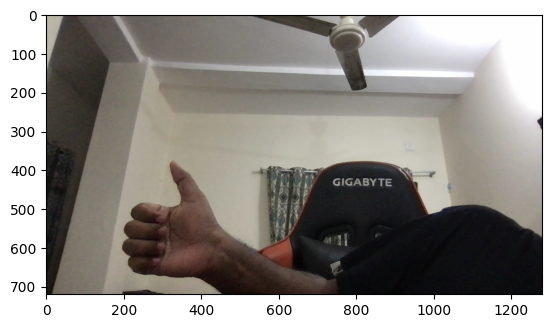

In [40]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Real Time Detection

In [38]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

KeyboardInterrupt: 